Processing 6.jpg


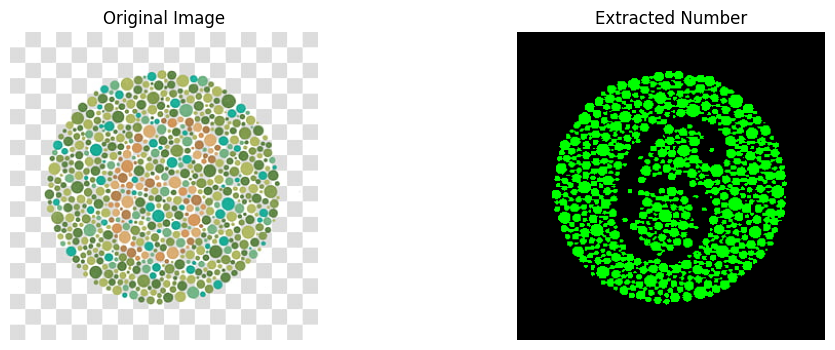

Processing 12.jpg


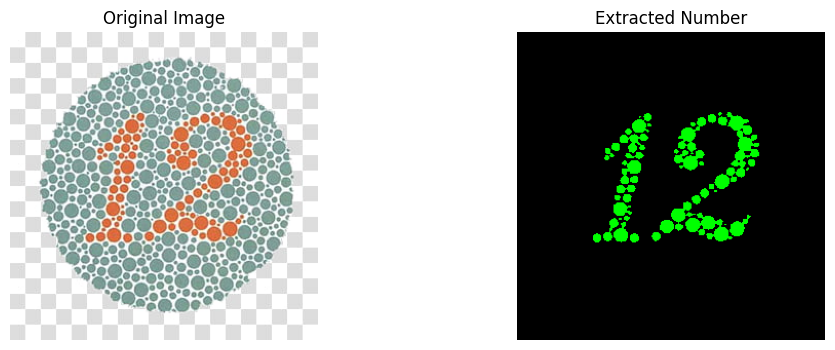

Processing 42.jpg


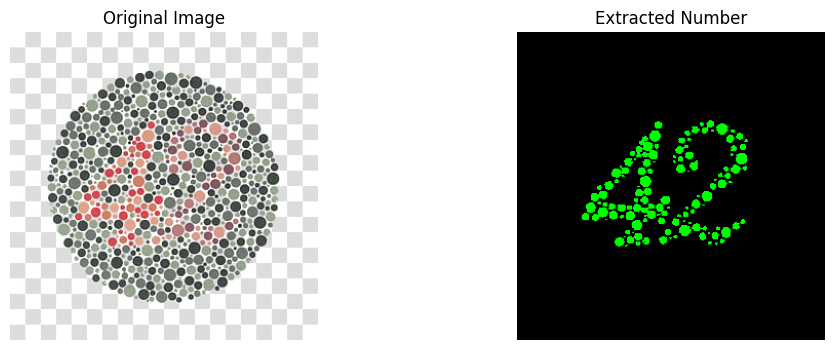

Processing 74.jpg


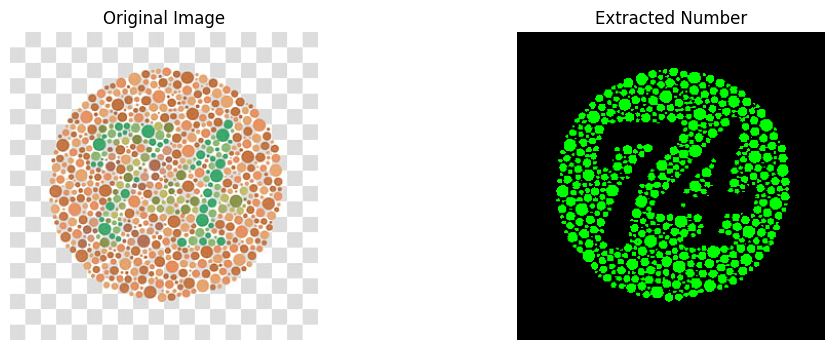

In [187]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import cv2

def process_ishihara(image_path, k=2):
    # Read the image
    image = cv2.imread(image_path)

    # Convert to Lab color space
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # Extract 'a' channel (red-green component)
    a_channel = lab_image[:, :, 1]

    # Reshape the a channel for clustering
    pixel_values = a_channel.reshape((-1, 1))

    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixel_values)

    # Reshape labels back to original image dimensions
    labels = kmeans.labels_.reshape(a_channel.shape)

    # Create output image (black background)
    output = np.zeros_like(image)

    # Find the cluster that represents the number
    # We'll use the cluster with fewer pixels (usually the number)
    unique, counts = np.unique(labels, return_counts=True)
    number_cluster = unique[np.argmin(counts)]

    # Set the pixels of the number cluster to green
    output[labels == number_cluster] = [0, 255, 0]

    # Display results
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Extracted number
    plt.subplot(1, 2, 2)
    plt.imshow(output)
    plt.title('Extracted Number')
    plt.axis('off')

    plt.show()

# Process each image
images = ['6.jpg', '12.jpg', '42.jpg', '74.jpg']

for img_path in images:
    print(f"Processing {img_path}")
    process_ishihara(img_path)

Processing 6.jpg


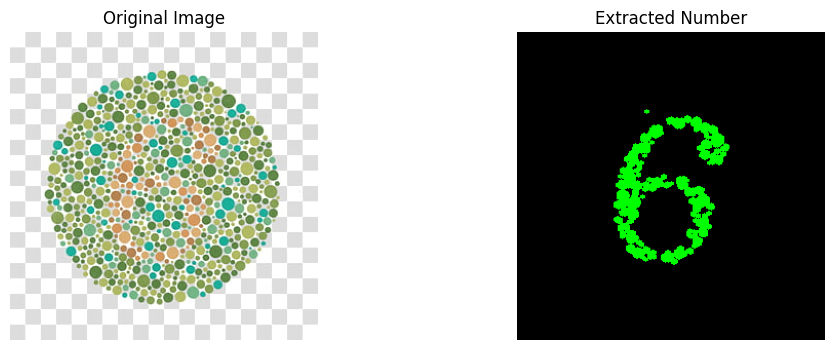

Processing 12.jpg


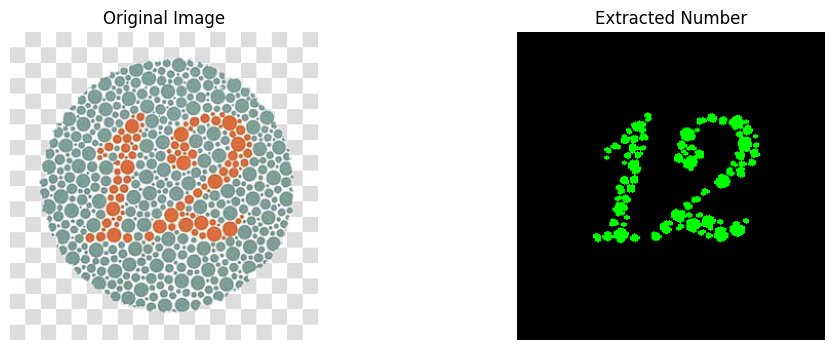

Processing 42.jpg


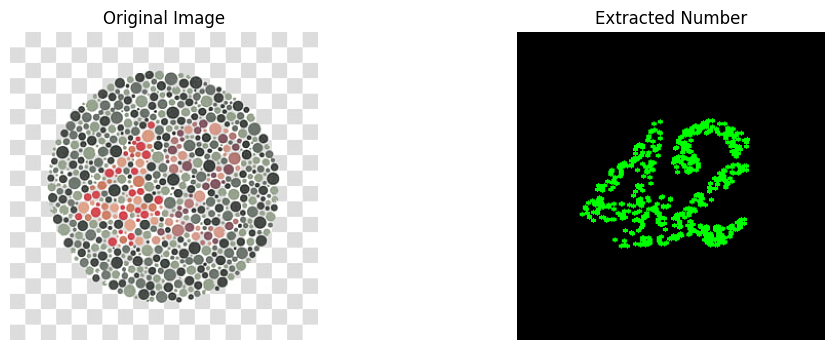

Processing 74.jpg


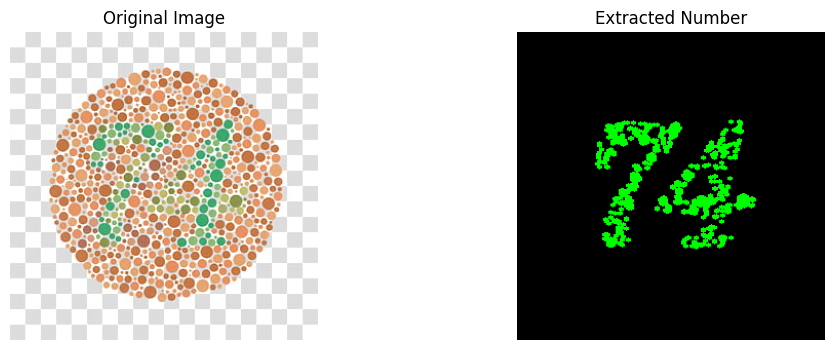

In [189]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import cv2

def process_ishihara(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert to Lab color space
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # Extract 'a' channel (red-green component)
    a_channel = lab_image[:, :, 1]

    # Set parameters based on image
    if image_path == '6.jpg':
        k = 19
        target_cluster = 12
    elif image_path == '12.jpg':
        k = 25
        target_cluster = 3
    elif image_path == '42.jpg':
        k = 25
        target_cluster = 18
    else:  # 74.jpg
        k = 25
        target_cluster = 21

    # Reshape the channel for clustering
    pixel_values = a_channel.reshape((-1, 1))

    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixel_values)

    # Reshape labels back to original image dimensions
    labels = kmeans.labels_.reshape(a_channel.shape)

    # Create binary mask for the target cluster
    mask = (labels == target_cluster).astype(np.uint8)

    # Apply morphological operations to fill the dots
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
    mask = cv2.dilate(mask, kernel, iterations=1)

    # Create output image (black background)
    output = np.zeros_like(image)

    # Set the pixels of the target cluster to bright green
    output[mask == 1] = [0, 255, 0]

    # Ensure the green is fully saturated
    output = cv2.convertScaleAbs(output, alpha=1.2, beta=0)

    # Display results
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Extracted number
    plt.subplot(1, 2, 2)
    plt.imshow(output)
    plt.title('Extracted Number')
    plt.axis('off')

    plt.show()

# Process each image
images = ['6.jpg', '12.jpg', '42.jpg', '74.jpg']

for img_path in images:
    print(f"Processing {img_path}")
    process_ishihara(img_path)